### Logistic Regression for multi-classification problems

The aims of this project is to implement logistic regression from scratch for multi-classification problems.

#### Setting <br>

$D =\left\{ (x_i, y_i)\right\}^{n}_{i=1}, x_i \in R^d, y_i \in \left\{−1, 1\right\}$

In the case of binary classification, the loss function is given by the following crossentropy loss given :

$$ l( \mathbb \theta) = \frac{1}{n} \sum_{i=1}^{n} ln(1+exp(-y_ix_i^T\theta)) \quad (1)$$ 

#### 1) Let us show (1)


We know that  $h_{\theta}(y_ix_i) = \frac{1}{1 + e^{-y_ix_i^{T}\theta}}$  with  $y_i \in \left\{−1, 1\right\}$

The likelihood can be writen : $\mathbb{P}(Y|X,\mathbb{\theta}) = \mathbb{P}(x_1, x_2, ... x_n | y, \theta) $

Assume that $x_i$ independent, so we have :

\begin{align}
\mathbb{P}(Y|X,\mathbb{\theta}) & = \prod_{i=1}^{n} \mathbb{P}(x|y,\theta), \quad \quad y_i \in \left\{−1, 1\right\}\\
\mathbb{P}(Y|X,\mathbb{\theta}) & = \prod_{i=1}^{n} \frac{1}{1 + e^{-y_ix_i^{T}\theta}}\\
\\
\mathbb{L}(Y|X,\mathbb{\theta}) & = \prod_{i=1}^{n} \frac{1}{1 + e^{-y_ix_i^{T}\theta}}\\
\end{align}

By using Log-likelihood, we have : 

\begin{align}
l(\theta) & = \log \left( \prod_{i=1}^{n} \frac{1}{1 + e^{-y_ix_i^{T}\theta}} \right)\\
 & =  \sum_{i=1}^{n}\log \left( \frac{1}{1 + e^{-y_ix_i^{T}\theta}} \right)\\
 & =  -\sum_{i=1}^{n}\log \left( 1 + e^{-y_ix_i^{T}\theta} \right)\\
- l(\theta) & = \sum_{i=1}^{n}\log \left( 1 + e^{-y_ix_i^{T}\theta} \right)\\
\end{align}



#### 2) Implementation
I use the iris dataset from scikit-learn and I implement a multi-classification problem on it. The
iris dataset has three labels 0,1,2; I Apply onehot encoding on them (1 for presence and -1 for absence). That means, I have three classes initially with Y $\in \left\{ 0, 1, 2 \right\}^n $; After applying onehot encoding, Y becomes Y $ \in   \left\{−1, 1\right\}^{n×3}$.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( "ignore" )

In [2]:
# data_df = pd.read_csv('iris.csv')
# data_df.head(10)

In [3]:
iris = datasets.load_iris()
name = iris.feature_names

In [4]:
df = pd.DataFrame(iris.data, columns = name)
df['Y'] = iris.target

In [5]:
df=df.rename(columns = {'sepal length (cm)': 'SepalLength', 
                     'sepal width (cm)': 'SepalWidth',
                     'petal length (cm)': 'PetalLength', 
                     'petal width (cm)': 'PetalWidth'})

In [6]:
# df['category']=df['y'].apply(lambda x: 'Adult' if x==18 else 'Child')
df['category']=df['Y'].apply(lambda x : 'setosa' if x==0 else ('versicolor' if x == 1 else 'virginica'))


In [7]:
df.drop(columns = ['Y'], inplace = True)

In [8]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,category
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
# print(list(iris.target_names))
# df['category'].value_counts()

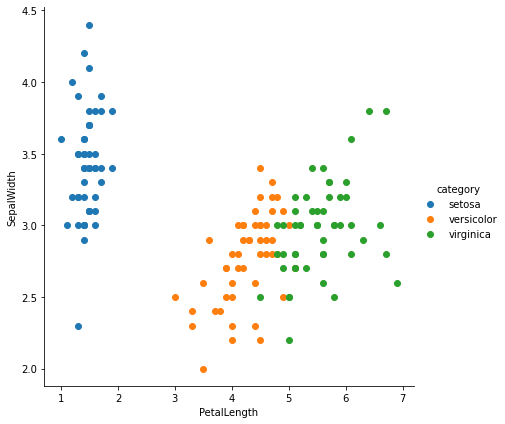

In [10]:
sns.FacetGrid(df,hue="category", height=6).map(plt.scatter,"PetalLength","SepalWidth").add_legend()

In [11]:

df['Y'] = iris.target
# df = df[df['Predict'] != 2]
Y = df['Y']
X = df[['SepalLength','SepalWidth','PetalLength','PetalWidth']].values
df.drop(columns = ['category'], inplace = True)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

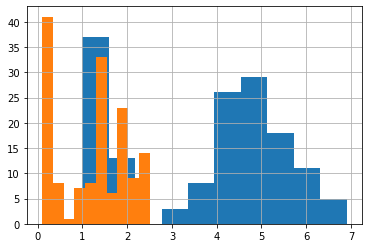

In [12]:
df['PetalLength'].hist()
df['PetalWidth'].hist()

#Blue - petalLenth
#Orange- petalWidth

<AxesSubplot:>

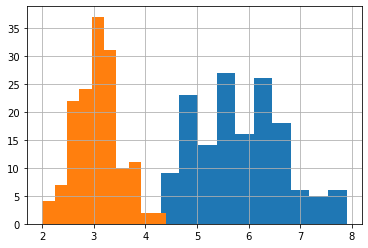

In [13]:
df['SepalLength'].hist()
df['SepalWidth'].hist()

#Blue - SepalLenth
#Orange- SepalWidth

In [14]:
df['setosa'] = df['Y'].apply(lambda x: 1 if x==0 in Y else -1)
df['versicolor'] = df['Y'].apply(lambda x: 1 if x==1 in Y else -1)
df['virginica'] = df['Y'].apply(lambda x: 1 if x==2 in Y else -1)

df.drop(columns = ['Y'], inplace = True)

In [15]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1,-1,-1
1,4.9,3.0,1.4,0.2,1,-1,-1
2,4.7,3.2,1.3,0.2,1,-1,-1
3,4.6,3.1,1.5,0.2,1,-1,-1
4,5.0,3.6,1.4,0.2,1,-1,-1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1,-1,1
146,6.3,2.5,5.0,1.9,-1,-1,1
147,6.5,3.0,5.2,2.0,-1,-1,1
148,6.2,3.4,5.4,2.3,-1,-1,1


In [16]:
#### Spliting of our Dataset

In [17]:
#This function split the (x,y) to (x_train, y_train) and (x_test, y_test). This function return an arrays.
def split_data(df, train_percent= 0.8):
    np.random.seed(2)
    perm = np.random.permutation(df.index)

    n= len(df)
    train_index = int(train_percent * n)

    train = df.iloc[perm[:train_index]]
    test = df.iloc[perm[train_index:]]

    x_train, x_test, y_train, y_test= train.iloc[:, :-3], test.iloc[:, :-3], train.iloc[:,-1], test.iloc[:,-1]
    return x_train.values, x_test.values, y_train.values, y_test.values

In [18]:
# train.iloc[:,-1], test.iloc[:,-1] : Virginica
# train.iloc[:,-2], test.iloc[:,-2] : versicolor
# train.iloc[:,-3], test.iloc[:,-3] : Setosa

In [19]:
x_train, x_test, y_train, y_test= split_data(df) 
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(f'X train size: {x_train.shape}')
print(f'X test size: {x_test.shape}')
print(f'y train size: {y_train.shape}')
print(f'y test size: {y_test.shape}')

X train size: (120, 4)
X test size: (30, 4)
y train size: (120,)
y test size: (30,)


In [20]:
class logregression_regularized:
    def __init__(self,x_test,y_test, num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr=0.00001,batch_size=32):
        self.batch_size=batch_size
        self.num_iters=num_iters
        self.threshold=threshold
        self.tolerance=tolerance
        self.lr=lr
        self.theta=None
        self.cost_history=[]
        self.cost_history_test=[]
        self.x_test=x_test
        self.y_test=y_test
        self.losses=[]


    def add_ones(self, x):
        return np.hstack([np.ones((x.shape[0],1)),x])
    

    def sigmoid(self, x, theta):
        z = (x @ theta) #we don't put x.T because is not for one row but on every dataset y.T@(x @ theta)
        s = 1 / (1 + np.exp(-z))
        return s

    def cross_entropy(self, x, y_true):
        n =len(x) # Length of x
        z=-y_true*(x@self.theta)
        a = 1 / (1 + np.exp(-z))
        Cost = np.sum(np.log(a))
        return Cost/n 
    
    def fit(self, x,y):
        x= self.add_ones(x) # Add ones to x
        y= y.reshape(-1,1) # reshape y. This is optional, do it if needed
        self.theta= np.zeros((x.shape[1], 1)) # Initialize theta to zeros vector >>> (x.shape[1])
        current_iter= 1
        norm= 1

        self.x_test= self.add_ones(self.x_test) # Add ones to x
        self.y_test= self.y_test.reshape(-1,1) # reshape y. This is optional, do it if needed

        while (norm >= self.tolerance and current_iter < self.num_iters):
            dataset=np.c_[x,y]
            np.random.seed(3)
            np.random.shuffle(dataset)
            x=dataset[:,:-1]
            y=dataset[:,-1]
            theta_old = self.theta.copy() # Get old theta
            
            #mini-batch
            for i in range(0,len(x),self.batch_size):
                end=i+self.batch_size
                x_=x[i:end,:]
                y_=y[i:end].reshape(-1,1)

          # make predictions 
                z=-y_*(x_@self.theta)
                a = 1 / (1 + np.exp(-z))
                #y_pred= self.sigmoid(x_,self.theta) # using sigmoid function 
              # Gradient of cross-entropy
                
                grad= -x_.T@ (a*y_) #y_pred*(x_.T@ y_)
        
                grad= grad.reshape(-1,1) # Reshape, if it is needed

              # update rules
                self.theta= self.theta - grad * self.lr
              # Compute the training loss
                self.losses.append(self.cross_entropy(x_,y_))

            #training_loss=self.cross_entropy(x,y)
       
            self.cost_history.append(np.mean(self.losses))
            test_loss=self.cross_entropy(self.x_test,self.y_test)
            self.cost_history_test.append(test_loss)

              # Convergence criteria:
            if current_iter%100 == 0:
                print(f'cost for {current_iter} iteration : {self.cross_entropy(x_, y_)}')
            norm = np.linalg.norm(theta_old - self.theta)
            current_iter += 1

    def predict(self, x):
        proba= self.predict_proba(x) # Get probability of x
        result= [1 if i > self.threshold else -1 for i in proba] # Convert proba to 0 or 1. hint: list comprehension
        return np.array(result) 
  
    
    def predict_proba(self, x):
        x=self.add_ones(x) # Apply add ones to x
        y_pred_prob= self.sigmoid(x, self.theta) # Predict proba with sigmoid
        return y_pred_prob
    
    def accuracy(self,ypred,y_test):
        return (np.sum(y_test==ypred)/len(y_test))*100

  
    def plot(self):
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.plot(np.arange(len(self.cost_history)), self.cost_history, 'r', linewidth = "2", label= 'Train Loss')
        plt.plot(np.arange(len(self.cost_history_test)), self.cost_history_test, 'b', linewidth = "2", label= 'Validation Loss')
        plt.legend()
        plt.show()

In [21]:
model1 = logregression_regularized(x_test,y_test,num_iters=8000)

In [22]:
%%time
model1.fit(x_train, y_train)

cost for 100 iteration : -0.7221490549100852
cost for 200 iteration : -0.7746923256093149
cost for 300 iteration : -0.807190735777975
cost for 400 iteration : -0.8186454882004931
cost for 500 iteration : -0.8905659904557869
cost for 600 iteration : -0.8940660363136687
cost for 700 iteration : -0.8658778883122054
cost for 800 iteration : -0.9189674345830662
cost for 900 iteration : -1.0051854599665822
cost for 1000 iteration : -0.975355489946841
cost for 1100 iteration : -0.8098856218017693
cost for 1200 iteration : -0.9988120946683526
cost for 1300 iteration : -1.0666205212720306
cost for 1400 iteration : -1.03391321495859
cost for 1500 iteration : -0.9658481994590357
cost for 1600 iteration : -1.1485411930129428
cost for 1700 iteration : -1.1600896541420844
cost for 1800 iteration : -1.0605196756135606
cost for 1900 iteration : -1.1202775117317645
cost for 2000 iteration : -1.2024281606450362
cost for 2100 iteration : -1.2766165006907293
cost for 2200 iteration : -1.1317639964717594
c

In [23]:
pred1= model1.predict(x_test)
pred1

array([ 1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
        1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1])

In [24]:
# Predict Proba
print(model1.predict_proba(x_test))

[[0.53922584]
 [0.01083587]
 [0.52833149]
 [0.3403147 ]
 [0.33654961]
 [0.30657896]
 [0.66001723]
 [0.33051531]
 [0.00503501]
 [0.02185704]
 [0.72774971]
 [0.32294164]
 [0.74759983]
 [0.01074853]
 [0.72050385]
 [0.01061045]
 [0.66132528]
 [0.68504258]
 [0.01243139]
 [0.45369708]
 [0.01854961]
 [0.64688083]
 [0.33221631]
 [0.01380808]
 [0.78829174]
 [0.28550491]
 [0.0195707 ]
 [0.00906306]
 [0.56665295]
 [0.00499139]]


In [25]:
#Display the probabilities into dataframe
prob_virginica=pd.DataFrame(model1.predict_proba(x_test))
# prob_virginica

In [26]:
#Display accuracy of the model
model1.accuracy(pred1,y_test)

90.0

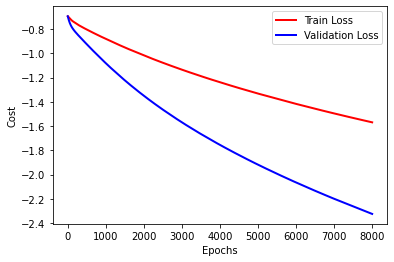

In [27]:
model1.plot()

In [28]:
#to save the probability generated into csv file

#prob_virginica.to_csv('prob_virginica.csv', index=False)

In [29]:
virginica_df = pd.read_csv('prob_virginica.csv')
virginica_df.rename(columns = {'0':'virginica'}, inplace = True)
virginica_df

,virginica
0,0.012315
1,0.963371
2,0.009770
3,0.047135
4,0.045569
5,0.046350
6,0.003649
7,0.024430
8,0.985763
9,0.934368


In [30]:
vesicolor_df = pd.read_csv('prob_versicolor.csv')
vesicolor_df.rename(columns = {'0':'vesicolor'}, inplace = True)
vesicolor_df

,vesicolor
0,0.014602
1,0.957638
2,0.011730
3,0.052587
4,0.050982
5,0.051783
6,0.004563
7,0.028092
8,0.982775
9,0.926413


In [31]:
setosa_df = pd.read_csv('prob_setosa.csv')
setosa_df.rename(columns = {'0':'setosa'}, inplace = True)
setosa_df

,setosa
0,0.017707
1,0.949961
2,0.014428
3,0.059470
4,0.057838
5,0.058649
6,0.005879
7,0.032881
8,0.978565
9,0.916136


In [32]:
#concatenation of csv file
# df2=setosa_df.join(virginica_df)
# df3=df2.join(vesicolor_df)
# df3

#### Concatenation of the 3 csv file

In [33]:
dfinal=pd.merge(setosa_df, vesicolor_df, left_index=True, right_index=True)
dfinalAll=pd.merge(dfinal, virginica_df, left_index=True, right_index=True)
dfinalAll

,setosa,vesicolor,virginica
0,0.017707,0.014602,0.012315
1,0.949961,0.957638,0.963371
2,0.014428,0.011730,0.009770
3,0.059470,0.052587,0.047135
4,0.057838,0.050982,0.045569
5,0.058649,0.051783,0.046350
6,0.005879,0.004563,0.003649
7,0.032881,0.028092,0.024430
8,0.978565,0.982775,0.985763
9,0.916136,0.926413,0.934368


### Find argmax of the probability

In [34]:
dfObj = pd.DataFrame(dfinalAll)

In [35]:
# Get a series containing maximum value of each row
maxValuesObj = dfObj.max(axis=1)
dfProb=pd.DataFrame(maxValuesObj)

In [36]:
dfProb.rename(columns = {0:'Probability'}, inplace = True)
dfProb

,Probability
0,0.017707
1,0.963371
2,0.014428
3,0.059470
4,0.057838
5,0.058649
6,0.005879
7,0.032881
8,0.985763
9,0.934368


In [37]:
# dfinalAll['ArgMax'] = dfinalAll.apply(lambda x: dfinalAll.columns[x.argmax()], axis = 1)

#### Display of each target name corresponding to each probability

In [38]:
dfProb['Category'] = dfinalAll.apply(lambda x: dfinalAll.columns[x.argmax()], axis = 1)
dfProb

,Probability,Category
0,0.017707,setosa
1,0.963371,virginica
2,0.014428,setosa
3,0.059470,setosa
4,0.057838,setosa
5,0.058649,setosa
6,0.005879,setosa
7,0.032881,setosa
8,0.985763,virginica
9,0.934368,virginica
